In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../Data/academic_performance_100.csv')
df.isnull().sum()

StudentID     0
Name          0
Age           0
Gender        0
Maths         0
Science       0
English       0
Attendance    0
Grade         0
dtype: int64

In [3]:
df = pd.get_dummies(df, columns=['Gender'], prefix='', prefix_sep='',dtype=int)
df = pd.get_dummies(df, columns=['Grade'], prefix='', prefix_sep='',dtype=int)
df

,StudentID,Name,Age,Maths,Science,English,Attendance,Female,Male,A,B,C,F
0,1,John,16,85,92,88,90,0,1,1,0,0,0
1,2,Sophia,15,78,85,82,80,1,0,0,1,0,0
2,3,Emma,16,95,96,94,95,0,1,1,0,0,0
3,4,Michael,15,45,55,50,65,1,0,0,0,1,0
4,5,Oliver,17,30,25,40,50,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Owen,16,85,90,87,88,1,0,1,0,0,0
96,97,Charlotte,16,60,78,72,70,0,1,0,1,0,0
97,98,Dylan,15,88,85,92,80,1,0,1,0,0,0
98,99,Sophia,16,95,93,91,85,0,1,1,0,0,0


In [8]:
scale = MinMaxScaler()
df.iloc[:,2:] = scale.fit_transform(df.iloc[:,2:]).astype(float)
df

,StudentID,Name,Age,Maths,Science,English,Attendance,Female,Male,A,B,C,F
0,1,John,0.5,0.846154,0.943662,0.888889,0.888889,0,1,1,0,0,0
1,2,Sophia,0.0,0.738462,0.845070,0.777778,0.666667,1,0,0,1,0,0
2,3,Emma,0.5,1.000000,1.000000,1.000000,1.000000,0,1,1,0,0,0
3,4,Michael,0.0,0.230769,0.422535,0.185185,0.333333,1,0,0,0,1,0
4,5,Oliver,1.0,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Owen,0.5,0.846154,0.915493,0.870370,0.844444,1,0,1,0,0,0
96,97,Charlotte,0.5,0.461538,0.746479,0.592593,0.444444,0,1,0,1,0,0
97,98,Dylan,0.0,0.892308,0.845070,0.962963,0.666667,1,0,1,0,0,0
98,99,Sophia,0.5,1.000000,0.957746,0.944444,0.777778,0,1,1,0,0,0


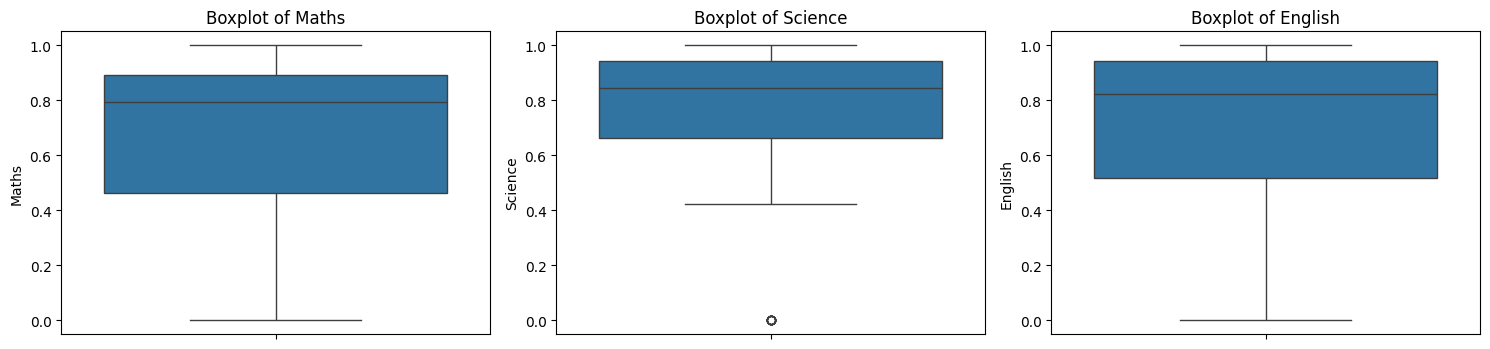

In [5]:
plt.figure(figsize=(15,10))
for i, column in enumerate(df.columns[3:6], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()
   

In [6]:
z_scores = np.abs(df.select_dtypes(include=[np.number]))
threshold = 3
df_cleaned = df[(z_scores < threshold).all(axis=1)]
print(df_cleaned)

   StudentID    Name  Age     Maths   Science   English  Attendance  Female  \
0          1    John  0.5  0.846154  0.943662  0.888889    0.888889       0   
1          2  Sophia  0.0  0.738462  0.845070  0.777778    0.666667       1   

   Male  A  B  C  F  
0     1  1  0  0  0  
1     0  0  1  0  0  


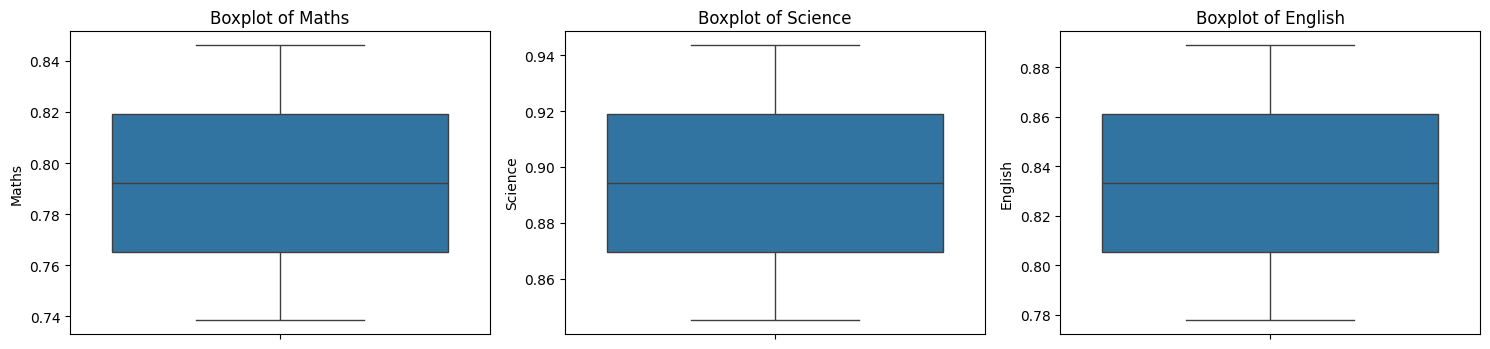

In [7]:
plt.figure(figsize=(15,10))
for i, column in enumerate(df_cleaned.columns[3:6], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_cleaned, y=column)
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()